In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# batch, 28, 28, 16
x = MaxPooling2D((2, 2), padding='same')(x)
# batch, 14, 14, 16
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# batch, 14, 14, 8
x = MaxPooling2D((2, 2), padding='same')(x)
# batch, 7, 7, 8
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# batch, 7, 7, 8
encoded = MaxPooling2D((2, 2), padding='same')(x)
# batch, 4, 4, 8

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# batch, 4, 4, 8
x = UpSampling2D((2, 2))(x)
# batch, 8, 8, 8
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# batch, 8, 8, 8
x = UpSampling2D((2, 2))(x)
# batch, 16, 16, 8
x = Conv2D(32, (3, 3), activation='relu')(x)
# batch, 14, 14, 16
x = UpSampling2D((2, 2))(x)
# batch, 28, 28, 16
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# batch, 28, 28, 1
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [3]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 119s 2ms/step - loss: 0.2097 - val_loss: 0.1598
Epoch 2/50
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1473 - val_loss: 0.1346
Epoch 3/50
60000/60000 [==============================] - 120s 2ms/step - loss: 0.1336 - val_loss: 0.1290
Epoch 4/50
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1270 - val_loss: 0.1219
Epoch 5/50
60000/60000 [==============================] - 120s 2ms/step - loss: 0.1224 - val_loss: 0.1195
Epoch 6/50
60000/60000 [==============================] - 120s 2ms/step - loss: 0.1189 - val_loss: 0.1168
Epoch 7/50
60000/60000 [==============================] - 120s 2ms/step - loss: 0.1164 - val_loss: 0.1169
Epoch 8/50
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1142 - val_loss: 0.1116
Epoch 9/50
60000/60000 [==============================] - 121s 2ms/step - loss: 0.1124 - val_loss: 0.1

In [0]:
decoded_imgs = autoencoder.predict(x_test)

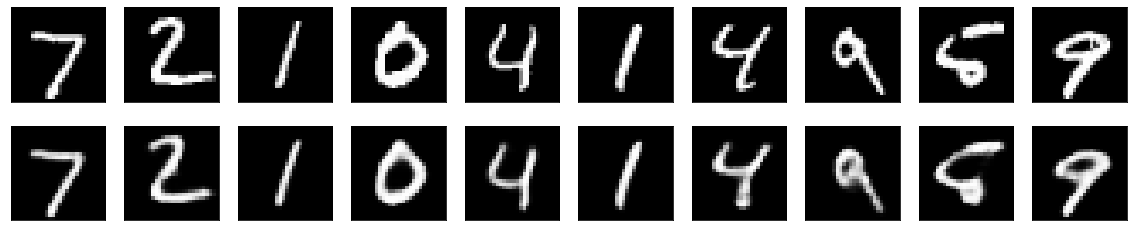

In [5]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()